/song?id=551816010    我们
/song?id=25906124    不要说话
/song?id=65766    富士山下
/song?id=65533    红玫瑰
/song?id=65528    淘汰
/song?id=65538    好久不见
/song?id=28563317    阴天快乐
/song?id=64093    孤独患者
/song?id=65536    爱情转移
/song?id=65800    最佳损友
/song?id=64634    一丝不挂
/song?id=28481818    可以了
/song?id=66282    浮夸
/song?id=28481103    你给我听好
/song?id=65923    人来人往 (Live)
/song?id=64317    因为爱情
/song?id=64293    苦瓜
/song?id=27867449    倾城
/song?id=64561    单车(Live) - live
/song?id=25730757    稳稳的幸福
/song?id=65761    白玫瑰
/song?id=64126    内疚
/song?id=66285    葡萄成熟时
/song?id=64797    于心有愧
/song?id=64922    落花流水
/song?id=64048    完
/song?id=64443    约定(Live)
/song?id=31877628    十年(Live)
/song?id=25638273    梦想天空分外蓝
/song?id=27483204    斯德哥尔摩情人
/song?id=64833    沙龙
/song?id=186331    最冷一天
/song?id=27483203    失忆蝴蝶
/song?id=64638    陀飞轮
/song?id=65758    裙下之臣
/song?id=65904    十面埋伏 (Live)
/song?id=64625    无人之境
/song?id=65769    不如不见
/song?id=65312    明年今日 - 2007 Live
/song?id=66272    夕阳无限好
/song?id=67

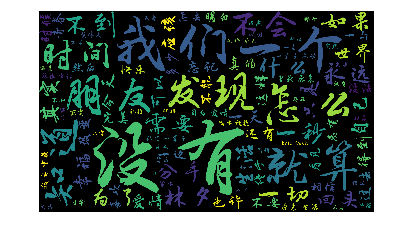

In [3]:
# -*- coding:utf-8 -*-
# 网易云音乐 通过歌手 ID，生成该歌手的词云
import requests
import sys
import re
import os
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import jieba
from PIL import Image
import numpy as np
from lxml import etree
import warnings
warnings.filterwarnings('ignore')
 
headers = {
       'Referer'  :'http://music.163.com',
       'Host'     :'music.163.com',
       'Accept'   :'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8',
       'User-Agent':'Chrome/10'
    }
 
# 得到某一首歌的歌词
def get_song_lyric(headers,lyric_url):
    res = requests.request('GET', lyric_url, headers=headers)
    if 'lrc' in res.json():
       lyric = res.json()['lrc']['lyric']
       new_lyric = re.sub(r'[\d:.[\]]','',lyric)
       return new_lyric
    else:
       return ''
       print(res.json())
# 去掉停用词
def remove_stop_words(f):
    stop_words = ['作词', '作曲', '编曲', 'Arranger', '录音', '混音', '人声', 'Vocal', '弦乐', 'Keyboard', '键盘', '编辑', '助理', 'Assistants', 'Mixing', 'Editing', 'Recording', '音乐', '制作', 'Producer', '发行', 'produced', 'and', 'distributed']
    for stop_word in stop_words:
       f = f.replace(stop_word, '')
    return f
# 生成词云
def create_word_cloud(f):
    print('根据词频，开始生成词云!')
    f = remove_stop_words(f)
    cut_text = " ".join(jieba.cut(f,cut_all=False, HMM=True))
    wc = WordCloud(
       font_path="./wc.ttf",
       max_words=100,
       width=2000,
       height=1200,
    )
    print(cut_text)
    wordcloud = wc.generate(cut_text)
    # 写词云图片
    wordcloud.to_file("wordcloud.jpg")
    # 显示词云文件
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
# 得到指定歌手页面 热门前 50 的歌曲 ID，歌曲名
def get_songs(artist_id):
    page_url = 'https://music.163.com/artist?id=' + artist_id
    # 获取网页 HTML
    res = requests.request('GET', page_url, headers=headers)
    # 用 XPath 解析 前 50 首热门歌曲
    html = etree.HTML(res.text)
    href_xpath = "//*[@id='hotsong-list']//a/@href"
    name_xpath = "//*[@id='hotsong-list']//a/text()"
    hrefs = html.xpath(href_xpath)
    names = html.xpath(name_xpath)
    # 设置热门歌曲的 ID，歌曲名称
    song_ids = []
    song_names = []
    for href, name in zip(hrefs, names):
       song_ids.append(href[9:])
       song_names.append(name)
       print(href, '  ', name)
    return song_ids, song_names
# 设置歌手 ID，陈奕迅为 2116
artist_id = '2116'
[song_ids, song_names] = get_songs(artist_id)
# 所有歌词
all_word = ''
# 获取每首歌歌词
for (song_id, song_name) in zip(song_ids, song_names):
    # 歌词 API URL
    lyric_url = 'http://music.163.com/api/song/lyric?os=pc&id=' + song_id + '&lv=-1&kv=-1&tv=-1'
    lyric = get_song_lyric(headers, lyric_url)
    all_word = all_word + ' ' + lyric
    print(song_name)
# 根据词频 生成词云
create_word_cloud(all_word)
